In [37]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

DATASET

In [38]:
from google.colab import files
upload = files.upload()

Saving insurance.txt to insurance (3).txt


In [39]:
df = pd.read_csv("insurance.txt")
df.insert(0,'x_0',1)
df = df.sample(frac = 1)

PRPROCESSING

In [40]:
def standardize(num, mu, sd):
  return (num - mu)/sd

In [41]:
def preprocessing_data(df):

  age_mean = df.mean()['age']
  age_sd = df.std()['age']

  bmi_mean = df.mean()['bmi']
  bmi_sd = df.std()['bmi']
  
  children_mean = df.mean()['children']
  children_sd = df.std()['children']

  charges_mean = df.mean()['charges']
  charges_sd = df.std()['charges']

  df['age'] = df['age'].apply(lambda num : standardize(num, age_mean, age_sd))
  df['bmi'] = df['bmi'].apply(lambda num : standardize(num, bmi_mean, bmi_sd)) 
  df['children'] = df['children'].apply(lambda num : standardize(num, children_mean, children_sd))
  df['charges'] = df['charges'].apply(lambda num : standardize(num, charges_mean, charges_sd))

  return df

FUNCTIONS

In [42]:
def predict(theta,x):
  return np.dot(x,theta)

In [43]:
def rmse(pred, y):
  return np.sqrt(((pred -y)**2).mean())

In [44]:
def error_val(pred, y):
  return (np.sum((pred-y)**2))/2

In [45]:
def stoch_grad_des(x, y, alpha, epochs):
  theta = np.random.randn(4)
  l = len(y)
  for i in range(epochs) :
    rand_num = np.random.randint(0,l)
    pred= np.dot(x[rand_num],theta)
    diff = np.subtract(pred,y[rand_num])
    theta = theta - alpha*(x[rand_num].T.dot(diff))
    cost_temp= 1/(2*l) * np.sum(np.square(np.dot(x,theta)-y))
    

  return theta

       Learning rate =  0.01


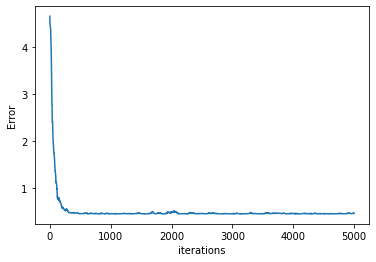

       Learning rate =  0.001


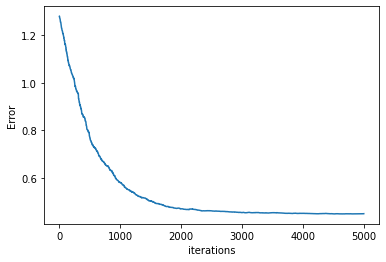

       Learning rate =  0.0001


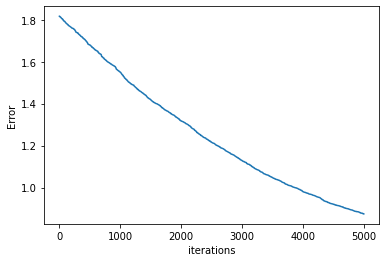

In [46]:
training_errors = []
train_sse = []
test_sse = []
test_errors = []
parameters_list = []

for i in range(20):
  #Training 
  df = df.sample(frac=1, random_state=i*100)
  df = df.reset_index(drop=True)
  df= preprocessing_data(df)
  train_ratio = int(0.7*len(df))
  train_X = np.array(df.drop(['charges'], axis=1)[:train_ratio])
  test_X = np.array(df.drop(['charges'], axis=1)[train_ratio:])
  train_Y = np.array(df['charges'][:train_ratio])
  test_Y = np.array(df['charges'][train_ratio:])
  parameters = stoch_grad_des(train_X,train_Y,0.001 ,10000)
  parameters_list.append(parameters)

  y_train_predict = predict(parameters,train_X)
  tr_error = rmse(train_Y, y_train_predict)
  training_errors.append(tr_error)

  train_sse_i = error_val(y_train_predict,train_Y)
  train_sse.append(train_sse_i)

  #Testing
  y_test_predict = predict(parameters,test_X)

  test_sse_i = error_val(y_test_predict,test_Y)
  test_sse.append(test_sse_i)

  test_error = rmse(test_Y , y_test_predict)
  test_errors.append(test_error)

for k in range(3):
  df = df.sample(frac=1, random_state=k*100)
  df = df.reset_index(drop=True)
  train_ratio = int(0.7*len(df))
  train_X = np.array(df.drop(['charges'], axis=1)[:train_ratio])
  train_Y = np.array(df['charges'][:train_ratio])
  alpha = [0.01 , 0.001 , 0.0001 ]
  feature_count = np.size(train_X[0])
  total_cases = np.size(train_X)
  theta = np.random.randn(4)
  error_fun = []
  l = len(train_Y)
  
  #for j in range(7):
  for i in range(10000):
    rand_num = np.random.randint(0,l) 
    pred= np.dot(train_X[rand_num],theta)
    diff = np.subtract(pred,train_Y[rand_num])
    theta = theta - alpha[k]*(train_X[rand_num].T.dot(diff))
    cost_temp= 1/(2*l) * np.sum(np.square(np.dot(train_X,theta)-train_Y))
    error_fun.append(cost_temp)

  plt.plot(error_fun)
  plt.xlabel('iterations') 
  plt.ylabel('Error')
  print('       Learning rate = ',alpha[k])
  plt.show()

In [47]:
error = np.array(test_errors)
print("Training :  SSE mean = {} and variance of SSE = {}".format(np.mean(train_sse),np.var(train_sse)))
print("Test set :, SSE mean = {} and variance of SSE = {}".format(np.mean(test_sse),np.var(test_sse)))
print("Training :, mean RMSE = {} and variance RMSE = {}".format(np.mean(training_errors),np.var(training_errors)))
print("Test set :, mean RMSE = {} and  variance RMSE = {}".format(np.mean(error),np.var(error)))

Training :  SSE mean = 413.8829129509716 and variance of SSE = 160.22094074450237
Test set :, SSE mean = 176.11173028898912 and variance of SSE = 162.24694911971366
Training :, mean RMSE = 0.940295413783466 and variance RMSE = 0.0002097334309674318
Test set :, mean RMSE = 0.9354516604126994 and  variance RMSE = 0.0011079536629103452


In [48]:
for index,i in enumerate(parameters_list):
  print("Weights of model {} are :".format(index+1),i)

Weights of model 1 are : [-0.03877859  0.32891564  0.14985377  0.0554505 ]
Weights of model 2 are : [-0.00453978  0.30071065  0.19681482  0.08590083]
Weights of model 3 are : [-0.00326324  0.23495422  0.13533069  0.10204579]
Weights of model 4 are : [0.01814923 0.27096073 0.18080212 0.080606  ]
Weights of model 5 are : [0.03545309 0.30665397 0.14287917 0.05448494]
Weights of model 6 are : [-0.02606699  0.23155633  0.17444911  0.07367789]
Weights of model 7 are : [0.01027763 0.26485408 0.16085071 0.05444987]
Weights of model 8 are : [-0.00541805  0.32094436  0.13996455  0.04182047]
Weights of model 9 are : [0.01703575 0.27647484 0.2158355  0.04359682]
Weights of model 10 are : [-0.05972233  0.31318469  0.15469816  0.09000119]
Weights of model 11 are : [-0.01333417  0.2848211   0.1635836   0.08698688]
Weights of model 12 are : [-0.01851148  0.26393256  0.1803227   0.05155498]
Weights of model 13 are : [0.03220052 0.27528933 0.19808745 0.04942079]
Weights of model 14 are : [0.000468   0.2